In [1]:
import tensorflow as tf
import os
import numpy as np



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_dir="/content/drive/MyDrive/dataset80-20/training"

In [ ]:
#preprocessing

In [5]:
IMAGE_SIZE=224
BATCH_SIZE=64

train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)



In [6]:
train_genarator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset80-20/training",
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

validation_generator=validation_datagen.flow_from_directory(
    "/content/drive/MyDrive/dataset80-20/testing",
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 12826 images belonging to 2 classes.
Found 3206 images belonging to 2 classes.


In [8]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob



In [ ]:
IMAGE_SIZE=[224,224]
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

58889256/58889256 [==============================] - 0s 0us/step


<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
    layer.trainable=False


In [9]:
folders=glob("/content/drive/MyDrive/dataset80-20/training/*")
print(len(folders))

2


In [ ]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
epoch=20

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

Epoch 1/20
201/201 [==============================] - 3238s 16s/step - loss: 0.1635 - accuracy: 0.9479 - val_loss: 0.1325 - val_accuracy: 0.9492
Epoch 2/20
201/201 [==============================] - 243s 1s/step - loss: 0.0596 - accuracy: 0.9841 - val_loss: 0.1332 - val_accuracy: 0.9451
Epoch 3/20
201/201 [==============================] - 241s 1s/step - loss: 0.0445 - accuracy: 0.9886 - val_loss: 0.1026 - val_accuracy: 0.9619
Epoch 4/20
201/201 [==============================] - 242s 1s/step - loss: 0.0352 - accuracy: 0.9899 - val_loss: 0.0799 - val_accuracy: 0.9741
Epoch 5/20
201/201 [==============================] - 239s 1s/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.0915 - val_accuracy: 0.9704
Epoch 6/20
201/201 [==============================] - 240s 1s/step - loss: 0.0266 - accuracy: 0.9926 - val_loss: 0.1215 - val_accuracy: 0.9529
Epoch 7/20
201/201 [==============================] - 240s 1s/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.1008 - val_accuracy: 0.96

In [ ]:
model.save('/content/drive/MyDrive/models 80-20/model-vggnet16-80-20.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#prediction

In [ ]:
from keras.preprocessing import image
import numpy as np

img_pred=image.load_img("/content/drive/MyDrive/cnv sample/CNV-8833506-60.jpeg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="cnv"


else:
    prediction="normal"
print(prediction)

1/1 [==============================] - 1s 760ms/step
[[1. 0.]]
cnv


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
validation_predictions = model.predict(validation_generator)
validation_labels = []
for _ in range(len(validation_generator)):
    _, labels = validation_generator.next()
    validation_labels.extend(np.argmax(labels, axis=1))

predicted_labels = np.argmax(validation_predictions, axis=1)

cm = confusion_matrix(validation_labels, predicted_labels)
class_names = train_genarator.class_indices  # Get class names
class_names = dict((v, k) for k, v in class_names.items())  # Invert the mapping

validation_labels = [class_names[label] for label in validation_labels]
predicted_labels = [class_names[label] for label in predicted_labels]

classification_metrics = classification_report(validation_labels, predicted_labels, target_names=folders)
print("Confusion Matrix:\n", cm)
print("\nClassification Metrics:\n", classification_metrics)


51/51 [==============================] - 20s 392ms/step
Confusion Matrix:
 [[750 853]
 [791 812]]

Classification Metrics:
                                                      precision    recall  f1-score   support

/content/drive/MyDrive/dataset80-20/training/normal       0.49      0.47      0.48      1603
   /content/drive/MyDrive/dataset80-20/training/cnv       0.49      0.51      0.50      1603

                                           accuracy                           0.49      3206
                                          macro avg       0.49      0.49      0.49      3206
                                       weighted avg       0.49      0.49      0.49      3206



In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import os
from glob import glob
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

# Load the saved VGGNet16 model
model_path = '/content/drive/MyDrive/models 80-20/model-vggnet16-80-20.h5'
model = tf.keras.models.load_model(model_path)

# Load the data generators
base_dir = "/content/drive/MyDrive/dataset80-20"
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 64

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Get class names and folders
folders = glob(os.path.join(base_dir, 'training', '*'))
class_names = [os.path.basename(folder) for folder in folders]

# Function to display and label images
def display_and_label_image(image_path, true_label, predicted_label):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img = image.img_to_array(img)
    img /= 255.0
    display(img)
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    print("========================================================")

# Initialize counters for each label
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0

# Iterate through the validation dataset to display and label images
for i, (images, labels) in enumerate(validation_generator):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    for j in range(len(images)):
        true_label = class_names[np.argmax(labels[j])]
        predicted_label = class_names[predicted_labels[j]]
        image_path = validation_generator.filepaths[i * BATCH_SIZE + j]

        if true_label == 'cnv' and predicted_label == 'cnv':
            display_and_label_image(image_path, "True Positive (TP)", "True Positive (TP)")
            tp_count += 1
        elif true_label == 'normal' and predicted_label == 'normal':
            display_and_label_image(image_path, "True Negative (TN)", "True Negative (TN)")
            tn_count += 1
        elif true_label == 'cnv' and predicted_label == 'normal':
            display_and_label_image(image_path, "False Negative (FN)", "False Negative (FN)")
            fn_count += 1
        elif true_label == 'normal' and predicted_label == 'cnv':
            display_and_label_image(image_path, "False Positive (FP)", "False Positive (FP)")
            fp_count += 1

    if tp_count >= 5 and tn_count >= 5 and fn_count >= 5 and fp_count >= 5:
        break

# Calculate the confusion matrix
validation_labels = [class_names[np.argmax(label)] for label in labels]
conf_matrix = confusion_matrix(validation_labels, [class_names[predicted_label] for predicted_label in predicted_labels])

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
classification_metrics = classification_report(validation_labels, [class_names[predicted_label] for predicted_label in predicted_labels])
print("\nClassification Report:\n", classification_metrics)


Output hidden; open in https://colab.research.google.com to view.

Found 3206 images belonging to 2 classes.
51/51 [==============================] - 21s 410ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


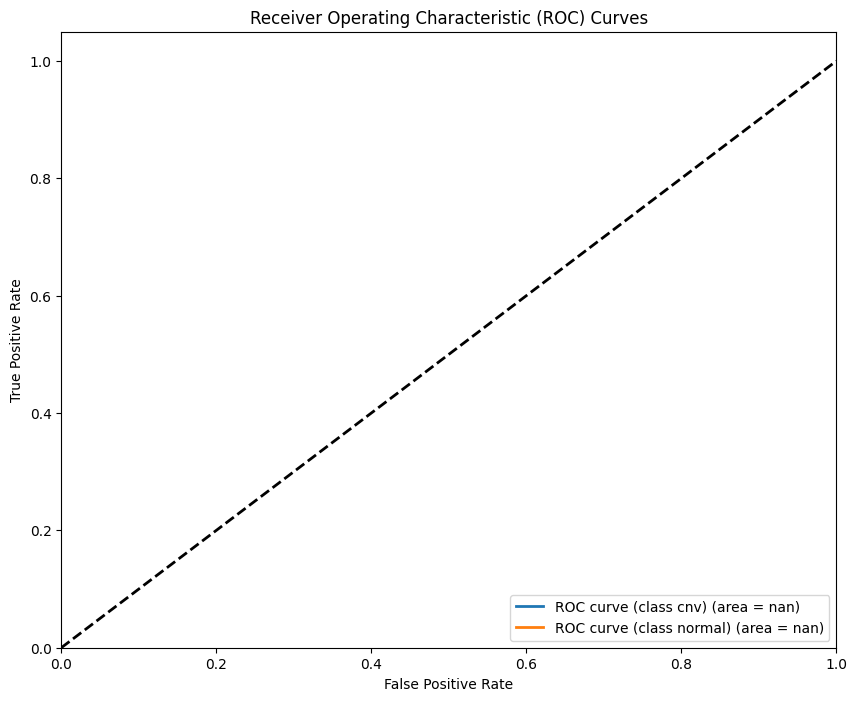

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the saved VGGNet16 model
model_path = '/content/drive/MyDrive/models 80-20/model-vggnet16-80-20.h5'
model = tf.keras.models.load_model(model_path)

# Load the data generators
base_dir = "/content/drive/MyDrive/dataset80-20"
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 64

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(base_dir, 'testing'),
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for the validation dataset
y_score = model.predict(validation_generator)

# Get class labels (one-hot encoded) and convert them to binary labels
y_true = validation_generator.classes
y_true_binary = np.zeros_like(y_score)
y_true_binary[np.arange(len(y_true)), y_true] = 1

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve (class {class_names[i]}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()
